<!--<div align="center">Семинар № 5-->

<div align="center"><font color=#4682B4 size=5 face=
                          "segoe print"><em><strong>Семинар № 8</strong></em></font></div>

<div class="alert alert-block alert-info"><em>
<b>ЗАДАЧА № 1.</b><br> Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br>
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],<br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br>
Найдите ковариацию этих двух величин с помощью элементарных действий,<br>
а затем с помощью функции cov из numpy.
Полученные значения должны быть равны.<br>
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.
</em></div>

<font size="2px">Для решения этой и следующих задач импортируем необходимые **Python-библиотеки:**

In [89]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

<font size="2px">Для начала построим график.

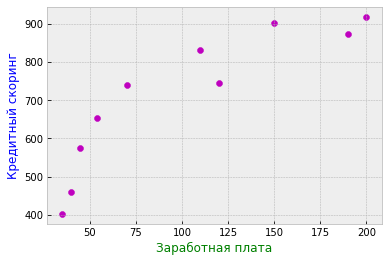

In [90]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

plt.style.use('bmh')
plt.xlabel('Заработная плата', c = 'g')
plt.ylabel('Кредитный скоринг', c = 'b')
plt.scatter(zp,ks, c = 'm')
plt.show()

<font size="2px">Из графика можно предположить, что данные имеют прямую статистическую взаимосвязь.<br>
Проверим это.<br><br>
Структурируем данные для работы в библиотеках _**Numpy**_ и _**Pandas :**_


In [91]:
zp_np = np.array(zp)
ks_np = np.array(ks)
zp_np, ks_np

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [92]:
df_pd = pd.DataFrame({"ZP": zp, "KS": ks})
df_pd

,ZP,KS
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


<font size="2px">Найдём ковариацию сначала по формуле : $cov_{xy}=M(X*Y)−M (X)∗M(Y)$,<br> 
 где $М$ – математическое ожидание,<br>
а затем с помощью библиотек _**Numpy**_ и _**Pandas**_ и сравним результаты.


In [93]:
aver_pr = sum([zp[i] * ks[i] for i in range(len(zp))]) / len(zp)
aver_zp = sum(zp) / len(zp)
aver_ks = sum(ks) / len(ks)
cov_0 = aver_pr - aver_zp * aver_ks

In [94]:
cov_0, np.cov(zp, ks, ddof = 0)[0,1], df_pd['ZP'].cov(df_pd['KS'], ddof = 0)

(9157.839999999997, 9157.840000000002, 9157.840000000002)

<div class="alert alert-block alert-success"><em>
Значения <b>равны.</b></em></div>

<font size="2px">Найдём коэффициент корреляции Пирсона сначала по формуле,<br>
а затем с помощью библиотек _**Numpy**_ и _**Pandas**_ и сравним результаты.

In [95]:
std_zp = (sum([el1**2 - aver_zp**2 for el1 in zp]) / len(zp)) ** 0.5
std_ks = (sum([el2**2 - aver_ks**2 for el2 in ks]) / len(ks)) ** 0.5

corr_0 = cov_0 / (std_zp * std_ks)
corr_0, np.corrcoef(zp, ks)[0,1], df_pd['ZP'].corr(df_pd['KS'])

(0.8874900920739153, 0.8874900920739163, 0.8874900920739163)

<div class="alert alert-block alert-success"><em>
Значения <b>равны.</b></em></div>

<div class="alert alert-block alert-success"><em>
<b>Ответ:</b><br> коэффициент корреляции Пирсона равен : $0.88749$.
</em></div>

***

<div class="alert alert-block alert-info"><em>
<b> ЗАДАЧА № 2. </b><br> Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:<br>
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.<br>
Известно, что в генеральной совокупности IQ распределен нормально.<br>
Найдите доверительный интервал для математического ожидания с надежностью 0.95.
</em></code>
</em></div>

<font size="2px">Поскольку генеральная совокупность распределена <b>нормально</b>
и нам <b>неизвестна</b> её дисперсия,<br>
то доверительный интервал найдём по формуле : 
<font size="4px">$B_{L/R} = \bar X \pm t_{tab}\frac{\sigma_{несм}}{\sqrt{n}}$</b><font size="2px">, где<br>
$\bar X $ - среднее по выборке;<br>
$t_{tab}$ - табличное значение $t$-критерия Стьюдента для двусторонней оценки $\alpha = (1-95\%)\ /\ 2=0,025$;<br>
$\sigma $ - несмещённое среднее квадратичное выборки;<br>
$n = 10$ - объем выборки.
<br><br>
Результат проверим с помощью встроенной функции из <b>Python</b>-библиотеки _**Scipy.stats**_. 

In [96]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
iq_mean = np.mean(iq)
iq_std = np.std(iq, ddof = 1)

<font size="2px">$iq\_mean$ - среднее по выборке;<br>
$iq\_std $ - несмещённое среднее квадратичное выборки.<br>
Найдём табличное значение $t$ - критерия :

In [97]:
t_tab = st.t.ppf(0.975, 10-1)

In [98]:
bor_left = iq_mean - t_tab * iq_std/ 10 ** 0.5
bor_right = iq_mean + t_tab * iq_std/ 10 ** 0.5
bor_left, bor_right

(110.55608365158724, 125.64391634841274)

In [99]:
st.t.interval(alpha = 0.95, df = 10 - 1, loc = iq_mean, scale = iq_std / 10 ** 0.5) 

(110.55608365158724, 125.64391634841274)

<div class="alert alert-block alert-success"><em>
Значения <b>равны.</b></em></div>

<div class="alert alert-block alert-success"><em>
<b>Ответ:</b><br>$[110,6;125,6]$ - доверительный интервал для математического ожидания
с надежностью 0.95
</em></div>

***

<div class="alert alert-block alert-info"><em>
<b> ЗАДАЧА № 3. </b><br> Известно, что рост футболистов в сборной распределен нормально<br> с дисперсией
генеральной совокупности, равной 25 кв.см.<br>
Объем выборки равен 27, среднее выборочное составляет 174.2.<br>
Найдите доверительный интервал для математического ожидания с надежностью 0.95
</em></code>

<font size="2px">Поскольку генеральная совокупность распределена **нормально**
и нам **известна** её **дисперсия**,<br>
то доверительный интервал найдём по формуле : 
<font size="4px">$B_{L/R} = \bar X \pm Z_{tab}\frac{\sigma}{\sqrt{n}}$</b>,<font size="2px"> где<br>
$\bar X = 174,2 см$ - среднее по выборке;<br>
$Z_{tab}$ - табличное значение $Z$-критерия для двусторонней оценки $\alpha = (1-95\%)\ /\ 2=0,025$;<br>
$v = 25 см^2$ - дисперсия генеральной совокупности;<br>
$n = 27$ - объем выборки.

In [102]:
height_mean = 174.2
v = 25
n = 27

<font size="2px">Найдём табличное значение $Z$ - критерия :

In [103]:
z_tab = st.norm.ppf((1 + 0.95) / 2)

In [104]:
b_left = height_mean - z_tab * (v / n) ** 0.5
b_right = height_mean + z_tab * (v / n) ** 0.5
b_left, b_right

(172.3140237765397, 176.08597622346028)

<font size="2px">Результат проверим с помощью встроенной функции из <b>Python</b>-библиотеки _**Scipy.stats**_.

In [105]:
st.norm.interval(alpha = 0.95, loc = height_mean, scale =  (v / n) ** 0.5)

(172.3140237765397, 176.08597622346028)

<div class="alert alert-block alert-success"><em>
Значения <b>равны.</b></em></div>

<div class="alert alert-block alert-success"><em>
<b>Ответ:</b><br>$[172,3;176,1]$ - доверительный интервал для математического ожидания
с надежностью 0.95
</em></div>